<a href="https://colab.research.google.com/github/ramdeveloper1985/datascience/blob/master/CropIn_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils
import imutils
from imutils import paths
import keras
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

In [101]:
#### Extract a list of image file names from the directory to visualise
PATH = 'data/'
#### run the list files command and get the top results and save it into a list object
files = !ls {PATH} | head 
print(files)

['Brocolli_1.jpeg', 'Brocolli_2.jpeg', 'Brocolli_3.jpeg', 'Brocolli_4.jpeg', 'Brocolli_5.jpeg', 'Brocolli_6.jpeg', 'Brocolli_7.jpeg', 'Capsicum_10.jpeg', 'Capsicum_1.jpeg', 'Capsicum_2.jpeg']


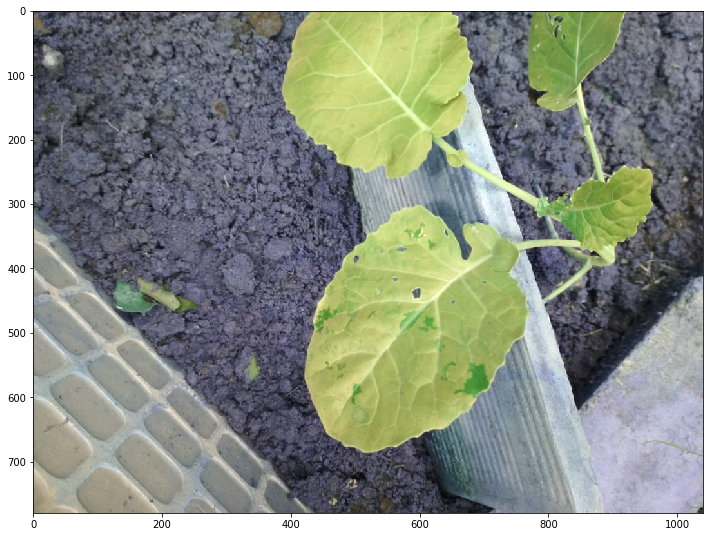

In [102]:
#### Open and Visualise a Single Image
img_path = PATH +files[0]
img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

In [103]:
#### the imutils paths.list_images function will return the full path of all images
#### in the current directory and its sub-directories
imagePaths = list(paths.list_images(PATH))
len(imagePaths)
imagePaths=[x.lower() for x in imagePaths]
for imgPath in imagePaths: 
    print(imgPath) 


data/carrot_5.jpeg
data/brocolli_7.jpeg
data/cucumber_11.jpeg
data/spinach_1.jpeg
data/raddish_3.jpeg
data/chilli_2.jpeg
data/okra_12.jpeg
data/brocolli_4.jpeg
data/carrot_1.jpeg
data/okra_7.jpeg
data/carrot_4.jpeg
data/spinach_9.jpeg
data/tomato_8.jpeg
data/okra_1.jpeg
data/spinach_8.jpeg
data/cucumber_5.jpeg
data/cucumber_8.jpeg
data/tomato_4.jpeg
data/okra_10.jpeg
data/capsicum_9.jpeg
data/cucumber_9.jpeg
data/cucumber_1.jpeg
data/capsicum_2.jpeg
data/spinach_10.jpeg
data/okra_5.jpeg
data/capsicum_6.jpeg
data/tomato_5.jpeg
data/spinach_7.jpeg
data/okra_17.jpeg
data/okra_8.jpeg
data/okra_13.jpeg
data/cucumber_3.jpeg
data/raddish_2.jpeg
data/okra_9.jpeg
data/zebera.jpeg
data/okra_4.jpeg
data/cucumber_2.jpeg
data/cucumber_10.jpeg
data/brocolli_6.jpeg
data/tomato_9.jpeg
data/spinach_2.jpeg
data/carrot_6.jpeg
data/redrad_4.jpeg
data/cucumber_7.jpeg
data/okra_2.jpeg
data/tomato_7.jpeg
data/redrad_1.jpeg
data/capsicum_5.jpeg
data/spinach_4.jpeg
data/raddish_1.jpeg
data/okra_6.jpeg
data/red

In [105]:
# insert the list to the set 
list_set = set(labels) 
# convert the set to the list 
unique_list = (list(list_set)) 
unique_list.sort() 
for x in unique_list: 
    print(x) 

brocolli
capsicum
carrot
chilli
cucumber
okra
raddish
redrad
spinach
tomato
zebera


In [106]:
import collections
ctr = collections.Counter(labels)
print("Frequency of the elements in the List : ",ctr)

Frequency of the elements in the List :  Counter({'okra': 20, 'cucumber': 11, 'spinach': 10, 'capsicum': 10, 'tomato': 9, 'brocolli': 7, 'carrot': 6, 'raddish': 4, 'chilli': 4, 'redrad': 4, 'zebera': 1})


<BarContainer object of 11 artists>

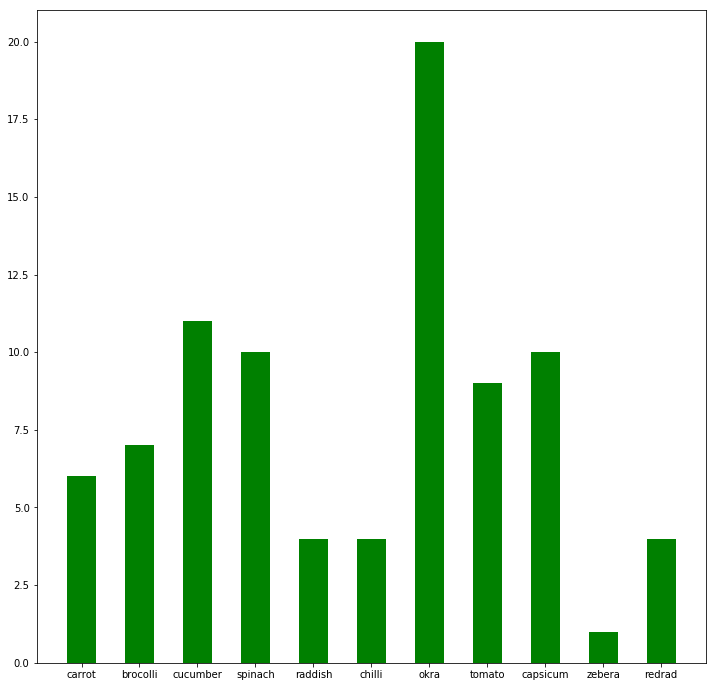

In [107]:
import matplotlib.pyplot as plt #### Basic Library for plotting graphs
#### Configuring Matplotlib to show Plots inline
%matplotlib inline 
plt.rcParams['figure.figsize'] = (12, 12) ### Setting the size of the Plots
plt.bar(ctr.keys(), ctr.values(), 0.5, color='g')

In [104]:
##### figure out the label of the image from its path
labels=[]
data=[]
for (i, imagePath) in enumerate(imagePaths):
    ##print(imagePath)
    image = cv2.imread(imagePath)
    #### Extract the label of the image from the image path
    label = imagePath.split(os.path.sep)[-1].split(".")[0].split("_")[0]
    #### Append the features and labels to our list variables
    data.append(features)
    labels.append(label)
    # show an update
    ## print("[INFO] processed {}/{}/{}".format(label,i, len(imagePaths)))
labels[0]

'carrot'

In [0]:
##### Print the labels of different objects to see they are different
print(labels[0])
print(labels[19])
print(data[6].shape)

carrot
Capsicum
(32, 32, 3)


In [0]:
#### Encode the labels to Numerical Values
le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels[0])

#### One Hot Encode the Numerical Values
labels = np_utils.to_categorical(labels, len(labels))
print(labels[0])

#### Scale the input pixel values
data = np.array(data) / 255.0

8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
#### Create a train test split
(trainData, testData, trainLabels, testLabels) = train_test_split(data, labels, test_size=0.25, random_state=42)

In [0]:
# input image dimensions
input_shape = data[0].shape
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(len(labels), activation='softmax'))

In [0]:
##### Intialise a Stochastic Gradient Descent Optimiser Object
sgd = SGD(lr=0.01)
model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy"])

In [0]:
#### Train the Model
pred=model.fit(trainData, trainLabels, epochs=150, batch_size=64)

Epoch 1/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0628 - acc: 0.9884
Epoch 2/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0628 - acc: 0.9884
Epoch 3/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0628 - acc: 0.9884
Epoch 4/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0628 - acc: 0.9884
Epoch 5/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0628 - acc: 0.9884
Epoch 6/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0628 - acc: 0.9884
Epoch 7/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0628 - acc: 0.9884
Epoch 8/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0628 - acc: 0.9884
Epoch 9/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0628 - acc: 0.9884
Epoch 10/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0628 - acc: 0.9884
Epoch 11/150
64/64 [==============================] - 0s 2m

In [0]:
(loss, accuracy) = model.evaluate(testData, testLabels, batch_size=64, verbose=1)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))

22/22 [==============================] - 0s 3ms/step
[INFO] loss=0.0626, accuracy: 98.8372%


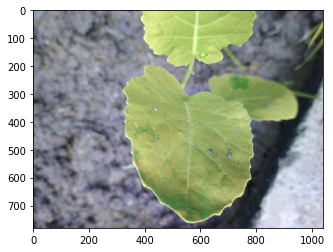

In [0]:
##### To Predict on a New Unseen Image
##### Step1 Laod an unseen image
image = cv2.imread("data/Brocolli_4.jpeg")
plt.imshow(image)
plt.show()

In [0]:
##### Flatten the test image
test_feature = cv2.resize(image, (32, 32))
print(test_feature.shape)

##### Reshape the test image shape to match the network thats expecting a set of images
test_feature = test_feature.reshape(-1,test_feature.shape[0],test_feature.shape[1],test_feature.shape[2])
print(test_feature.shape)


(32, 32, 3)
(1, 32, 32, 3)


In [0]:
##### Preprocess the test image
test_feature = cv2.resize(image, (32, 32))

print(test_feature.shape)
print(test_feature.shape)

test_feature = test_feature.reshape(-1,test_feature.shape[0],test_feature.shape[1],test_feature.shape[2])

prediction = model.predict_classes(test_feature)
print(prediction)
print(le.inverse_transform(prediction))

(32, 32, 3)
(32, 32, 3)
[5]
['Raddish']
